<a href="https://colab.research.google.com/github/vageeshmaiya/TS2Vec/blob/main/ts2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TS2Vec**

#### **Note**

Set the runtime to GPU before running the code.


##### **Steps to set the runtime to GPU**:
1. Click on the `Runtime` option displayed on the menu above.
2. Click on the `Change runtime type` option
3. Under `Hardware acclerators` choose GPU(if not already set) and click save.

### **1. Mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2. Changing Directory path**

##### **Steps To Follow**

1. Once the drive has been mounted go to the folder icon visible on the left hand side.

2. Click on the drive folder.

3. There find the folder containing the `train.py` file.

4. Right click on the folder and select the copy path option.

5. Make sure to copy and paste the path of the folder containing the `train.py` file in the code below. 

6. The path of the folder in the code below is: `%cd /content/drive/MyDrive/ts2vec/ts2vec-main.zip (Unzipped Files)/ts2vec-main`

In [ ]:
%cd /content/drive/MyDrive/ts2vec/ts2vec-main.zip (Unzipped Files)/ts2vec-main
!ls

### **3. Installing Requirements**

In [ ]:
pip install -r requirements.txt

### **4. Running the main code**

In [ ]:
#To better understand the code line below refer to the github repository.
!python -u train.py trial epochs_6_cc --epochs 6 --loader forecast_csv_univar --max-threads 8 --seed 42 --eval

Dataset: trial
Arguments: Namespace(batch_size=32, dataset='trial', epochs=6, eval=True, gpu=0, irregular=0, iters=None, loader='forecast_csv_univar', lr=0.0001, max_threads=8, max_train_length=3000, repr_dims=320, run_name='epochs_6_cc', save_every=None, seed=42)
Loading data...                       Voltage  ChargeCapacity
date                                         
2018-06-21 20:21:00  3.576402         0.00000
2018-06-21 20:23:00  3.575814         0.00000
2018-06-21 20:25:00  3.575203         0.00000
2018-06-21 20:27:00  3.574510         0.00000
2018-06-21 20:29:00  3.573856         0.00000
...                       ...             ...
2018-06-24 04:21:00  2.999990         0.98180
2018-06-24 04:23:00  3.864067         0.98180
2018-06-24 04:25:00  3.883207         0.98180
2018-06-24 04:27:00  3.887362         0.98180
2018-06-24 04:29:00  4.200016         0.00763

[1685 rows x 2 columns]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.98179996]
 [0.98179996]
 [0.00763049]]
done
E

### **5. Obtaining the pickel file**

In [ ]:
import pickle

##### **Steps to load the output pickle file**
1. Once the main code is run a new folder named `training` will be created(if not present previously) in the same location where `train.py` script is present.
2. The output folder obtained on execution of the main code is stored in the training folder under the given `run_name`.
3. The model prediction is in the form of a pickel file with the name `out.pkl` and is stored in the output folder.
4. Copy the path of the `out.pkl` file and paste it in the code below.
5. The path of the path of output pickel file considered below is : `/content/drive/MyDrive/ts2vec/ts2vec-main.zip (Unzipped Files)/ts2vec-main/training/trial__epochs_6_cc_20220322_115557/out.pkl`

In [ ]:
with open('/content/drive/MyDrive/ts2vec/ts2vec-main.zip (Unzipped Files)/ts2vec-main/training/trial__epochs_6_cc_20220322_115557/out.pkl', 'rb') as f:
    data = pickle.load(f)

##### **Converting the pickel output into dataframe**


In [ ]:
import pandas as pd
df1 = pd.DataFrame.from_dict(data)

In [ ]:
df1

,24,48,96,120,168
norm,"[[[[0.0405426], [0.0703876], [0.24437022], [0....","[[[[-0.03582752], [-0.02180314], [0.05204654],...","[[[[-0.00047421], [0.09481859], [0.19006634], ...","[[[[-0.05557466], [-0.00856727], [0.04173517],...","[[[[-0.05636856], [0.00884247], [0.05408931], ..."
raw,"[[[[0.8428376], [0.8563077], [0.9348322], [0.9...","[[[[0.80836904], [0.81469876], [0.84802973], [...","[[[[0.82432526], [0.86733425], [0.91032296], [...","[[[[0.7994565], [0.8206726], [0.84337586], [0....","[[[[0.79909813], [0.8285302], [0.8489517], [0...."
norm_gt,"[[[[0.08223983], [0.15032339], [0.21431603], [...","[[[[0.08223983], [0.15032339], [0.21431603], [...","[[[[0.08223983], [0.15032339], [0.21431603], [...","[[[[0.08223983], [0.15032339], [0.21431603], [...","[[[[0.08223983], [0.15032339], [0.21431603], [..."
raw_gt,"[[[[0.86165702], [0.89238554], [0.92126769], [...","[[[[0.86165702], [0.89238554], [0.92126769], [...","[[[[0.86165702], [0.89238554], [0.92126769], [...","[[[[0.86165702], [0.89238554], [0.92126769], [...","[[[[0.86165702], [0.89238554], [0.92126769], [..."


### **6. Plotting the prediction**

In [ ]:
pred = df1[96]['raw'] #Any horizon value(i.e 24,48,120,168) can be chosen instead of 96

In [ ]:
p1 = pred[:,:,0] #First sequence prediction
p1 = p1.reshape(pred.shape[1]) 
p2 = pred[:,:,-1] #Last sequence prediction
p2 = p2.reshape(pred.shape[1]) 

In [ ]:
gnd_truth = df1[96]['raw_gt']

In [ ]:
g1 = gnd_truth[:,:,0] #First sequence ground truth
g1 = g1.reshape(gnd_truth.shape[1]) 
g2 = gnd_truth[:,:,-1] #Last sequence ground truth
g2 = g2.reshape(gnd_truth.shape[1]) 

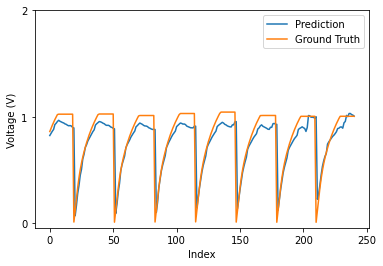

In [ ]:
# First sequence prediction v/s ground truth

import matplotlib.pyplot as plt
import numpy as np

plt.plot(p1,label = 'Prediction')
plt.plot(g1,label = 'Ground Truth')
plt.yticks(np.arange(0,3)) # can be altered to fit the plot
plt.xlabel('Index')
plt.ylabel('Voltage (V)') # can be altered as per the parameter considered
plt.legend()
plt.savefig('File_name.pdf')

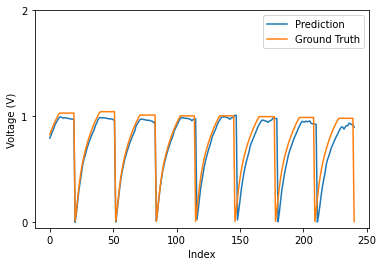

In [ ]:
# Last sequence prediction v/s ground truth

import matplotlib.pyplot as plt
import numpy as np

plt.plot(p2,label = 'Prediction')
plt.plot(g2,label = 'Ground Truth')
plt.yticks(np.arange(0,3)) # can be altered to fit the plot
plt.xlabel('Index')
plt.ylabel('Voltage (V)') # can be altered as per the parameter considered
plt.legend()
plt.savefig('File_name.pdf')

##### To obtain the path where the prediction plots are saved in drive run the codeline below

In [ ]:
pwd

'/content/drive/MyDrive/ts2vec/ts2vec-main.zip (Unzipped Files)/ts2vec-main'

### **7. Obtainin the error values for the first prediction sequence for all horizons**

In [ ]:
for i in [24,48,96,120,168]: # List contains all the horizon values
  pred = df1[i]['raw']
  p1 = pred[:,:,0]
  p1 = p1.reshape(pred.shape[1])
  gnd_truth = df1[i]['raw_gt']
  g1 = gnd_truth[:,:,0]
  g1 = g1.reshape(gnd_truth.shape[1])
  print('Horizon: ',i)
  print('mse: ',((p1 - g1) ** 2).mean())
  print('mae: ', np.abs(p1 - g1).mean())
  print('-------------------------------')

Horizon:  24
mse:  0.032028991372475696
mae:  0.08517073931117823
-------------------------------
Horizon:  48
mse:  0.033725828155372985
mae:  0.11097743506518493
-------------------------------
Horizon:  96
mse:  0.029754756224750437
mae:  0.089244672073301
-------------------------------
Horizon:  120
mse:  0.03564887061153775
mae:  0.11927310918056726
-------------------------------
Horizon:  168
mse:  0.030247694779554548
mae:  0.09446830673862044
-------------------------------


### **8. Plotting the error values**

In [ ]:
# The error values are take according to the values obtained above
horizon = [24,48,96,120,168]
mse = [0.032028991372475696,0.033725828155372985,0.029754756224750437,0.03564887061153775,0.030247694779554548]
mae = [0.08517073931117823,0.11097743506518493,0.089244672073301,0.11927310918056726,0.09446830673862044]

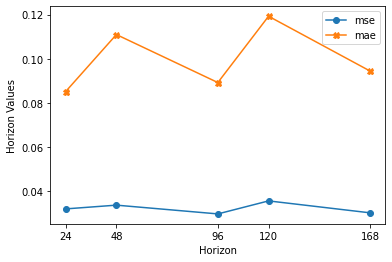

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(horizon,mse,marker = "o",label = "mse")
plt.plot(horizon,mae,marker = "X",label = "mae")
plt.xticks([24,48,96,120,168])
plt.xlabel('Horizon')
plt.ylabel('Horizon Values')
plt.legend()
plt.savefig('File_name.pdf',bbox_inches='tight')